### Optional -- technical details

**Part 2**
resource: 
1. https://www.kite.com/python/answers/how-to-check-if-a-string-contains-an-element-from-a-list-in-python

```
user_email = "abc@gmail.com"

email_services = ["hotmail", "gmail", "yahoo"]
email_contains_service = any(email_service in user_email for email_service in email_services)
```
2. https://stackoverflow.com/questions/4362981/beautifulsoup-how-do-i-extract-all-the-lis-from-a-list-of-uls-that-contains
3. https://stackoverflow.com/questions/61968521/python-web-scraping-request-errormod-security


### Part 1: introduction and inspecting datasets
The data to analyze in this file comes from the following github repository. (https://github.com/fivethirtyeight/data/tree/master/nba-elo) There are detailed explanations of meaning of column and how the data is collected.

First, let's import the dataset and expect the appearence of data ny using `df.head()`


In [3]:
import pandas as pd

nba_full = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv")
nba_full.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


To know that whether there are missing values, we check the count in each column by `df.info()`. Moreover, we print the column name of the dataframe to check if the name of the column is clean.

By the inspection, there isn't missing values, and we also don;t have to clean the column. Horray!

In [4]:
nba_full.info()
print(nba_full.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In this file, I will substract some columns in the original dataframe (`nba_full`) and store it in the `nba` dataframe. The columns I use is as follows: `"game_id", "year_id", "fran_id", "opp_fran", "game_location", "is_playoffs", "pts", "opp_pts", "game_result", "forecast`. After obtaining the desired dataframe, one can inspect the dataframe using `df.head()` again

If one forgot the meaning of the columns, he/she is always welcome to refer to the link at the start of the block.

In [6]:
nba = nba_full[["game_id", "year_id", "fran_id", "opp_fran", "game_location", "is_playoffs", "pts", "opp_pts", "game_result", "forecast"]]
nba["point_diff"] = nba.pts - nba.opp_pts
nba.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Huskies,Knicks,H,0,66,68,L,0.640065,-2
1,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
2,194611020CHS,1947,Stags,Knicks,H,0,63,47,W,0.631101,16
3,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
4,194611020DTF,1947,Falcons,Capitols,H,0,33,50,L,0.640065,-17


### Part 2: Inspecting values in the dataset
Before, we start analyzing, we want to know more about our data, so we print the unique value of specified columns, which are stored in the `column_desired` variable.

By the result, we can spot several interesting details.
* The data is collected from 1947 - 2015, and the data is updated every year.
* There are 53 teams in the data; however, there is only 30 teams exisiting now (at 2021). 23 teams disapperaed during the past 70 years! We can probably find what teams disappeared.
* The other unique values in the three columns are relatively simple.

In [9]:
column_desired = ["year_id", "fran_id", "game_location", "is_playoffs", "game_result"]
for i in column_desired:
    print(f"unique value for {i}", nba[i].unique())
    print("There are {} values in this column.".format(len(nba[i].unique())))
    print("\n")

unique value for year_id [1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
There are 69 values in this column.


unique value for fran_id ['Huskies' 'Knicks' 'Stags' 'Falcons' 'Capitols' 'Celtics' 'Steamrollers'
 'Ironmen' 'Bombers' 'Rebels' 'Warriors' 'Baltimore' 'Jets' 'Pistons'
 'Lakers' 'Kings' 'Hawks' 'Denver' 'Olympians' 'Redskins' 'Waterloo'
 'Packers' 'Sixers' 'Wizards' 'Bulls' 'Thunder' 'Squires' 'Stars'
 'Rockets' 'Colonels' 'Pacers' 'Nuggets' 'Spurs' 'Spirits' 'Sounds'
 'Floridians' 'Nets' 'Condors' 'Bucks' 'Suns' 'Clippers' 'Cavaliers'
 'Trailblazers' 'Sails' 'Jazz' 'Mavericks' 'Pelicans' 'Heat'
 'Timberwolves' 'Magic' 'Grizzlies' 'Raptors' 'Hornets']
There are 53 values in this

In the following two code blocks, I would like to answer the question about **what nba teams disappeared**. My steps to tackle the problems is:
* use BeautifulSoup module to obtain list of current basketball teams and store it into `teams_existing_2021`
* store the unique elements in series in the `fran_id` into `full_teams_from_1947` column
* I spot that there two data source call one team differntly (Sixers <-> 76ers), so change the element in list to make naming consistent
```
sixers_index = full_teams_from_1947.index("Sixers")
full_teams_from_1947[sixers_index] = "76ers"
```
* This step is a little bit tricky: I need to compare whether `full_teams_from_1947` has the similar element as `teams_existing_in_2021`, I use list comprehension and `any()` function to achieve the goal. Store the result into `teams_exist`
```
#list comprehension
[expression for item in iterable]
```
* Finally, use set operations to substract `full_teams_from_1947` and `teams_exisiting_2021` to obtain the teams disappeared. 

The **teams_disappeared** variable is our answer!


In [ ]:
# What teams does not exist now?
# use BeautifulSoup modules to answer the question
import requests
from bs4 import BeautifulSoup

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0'}
webpage_response = requests.get("https://stayonthecourt.com/list-of-nba-teams/", headers=headers)
webpage = webpage_response.content
soup = BeautifulSoup(webpage, "html.parser")


In [44]:
teams_existing_2021 = [] #longer ["New York Knicks", "Chccago Bulls"]
full_teams_from_1947 = nba.fran_id.unique().tolist() #shorter ["Huskie", "Knicks", "Paloon", ...]
teams_exist = []

# change the element in list first:
sixers_index = full_teams_from_1947.index("Sixers")
full_teams_from_1947[sixers_index] = "76ers"

for teams_raw in soup.find_all("ol"):
    for team in teams_raw.find_all("li"):
        teams_existing_2021.append(team.text)

# find team still existing using the "without area" format (ex: New York Knicks -> Knicks)
for team_old in full_teams_from_1947:
    if any(team_old in team_new for team_new in teams_existing_2021):
        teams_exist.append(team_old) 

#use set operation to find the teams disappeared
teams_disappeared = set(full_teams_from_1947) - set(teams_exist)
print(teams_disappeared)

{'Sounds', 'Huskies', 'Falcons', 'Redskins', 'Bombers', 'Waterloo', 'Colonels', 'Floridians', 'Condors', 'Steamrollers', 'Stags', 'Baltimore', 'Trailblazers', 'Sails', 'Capitols', 'Olympians', 'Jets', 'Ironmen', 'Rebels', 'Spirits', 'Stars', 'Packers', 'Squires'}


### Part 3: Exploratory Data Analysis (EDA)
Variable Type in the dataset:
* gameid - nominal categorical varible
* year_id - discrete quantiative variable
* fran_id, opp_fran - nominal categorical variable
* game location - nominal categorical variable
* is_playoff - nominal categorical variable (binary)
* game_result - nominal categorical variable (binary)
* point difference - discrete categorical varible

After knowing the datatype, we can do some summary statistics to describe the dataset.

In [ ]:
# The times each team appear
num_game_by_franId_10largest = nba.fran_id.value_counts().nlargest(10)
print(num_game_by_franId_10largest)
# ['Celtics', 'Knicks', 'Nets', 'Thunder', 'Spurs']


Lakers      6024
Celtics     5997
Knicks      5769
Warriors    5657
Pistons     5650
Sixers      5644
Hawks       5572
Kings       5475
Wizards     4582
Spurs       4309
Name: fran_id, dtype: int64


I write a function to plot all the categorical variables in a column. The column which has more than 6 unique values will be shown in barplot format; whereas the column don;t meet the criteria of 6 will be shown in pie chart.

In order to increae flexibility of the function, I use the unpacking operator `*args`, `**kwargs`

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# https://blog.csdn.net/chenjinyu_tang/article/details/8136841
def show_categorical_var_graph_new_ver2(df_name, col_name, *order, **kwargs):
    if len(df_name[col_name].unique()) > 6:
        arrange_order = order[0]
        plt.figure(figsize = (20,6))
        if arrange_order == False:
            sns.countplot(df_name[col_name], order = df_name[col_name].value_counts(ascending = True).index)
        else:
            sns.barplot(x = kwargs["x"], y = kwargs["y"], data = kwargs["data"])
        plt.xticks(rotation = 90)
        plt.show()
    else:
        pie_data = df_name[col_name].value_counts(normalize  = True)
        plt.pie(pie_data, labels = pie_data.index.tolist())
        plt.axis("equal")
        plt.show()

### Discussiion of the plot

**Figure 1**

From the plot, we cann know that which teams has the best performance, for they can play more games than others do. Some teams plays very few games, the reason might be that thwt were dismissed in a few years after the building of teams.

**Figure 2**

There is two interesting time in this plot. One is 1967-1968, and the other is 1998-1999.
* 1967-1968: https://en.wikipedia.org/wiki/1967%E2%80%9368_NBA_season
* 1998 - 1999: https://en.wikipedia.org/wiki/1998%E2%80%9399_NBA_season 

**Figure 3**

This plot shows whether the team in the `fran_id` played at their home city, away, or neutral. so approximately half of the games are played in home city, half od them is away.

**Figure 4**

The plot is not surprising. When there is a team win, there will be a team lose. So the area of win and lost will be 50% each.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


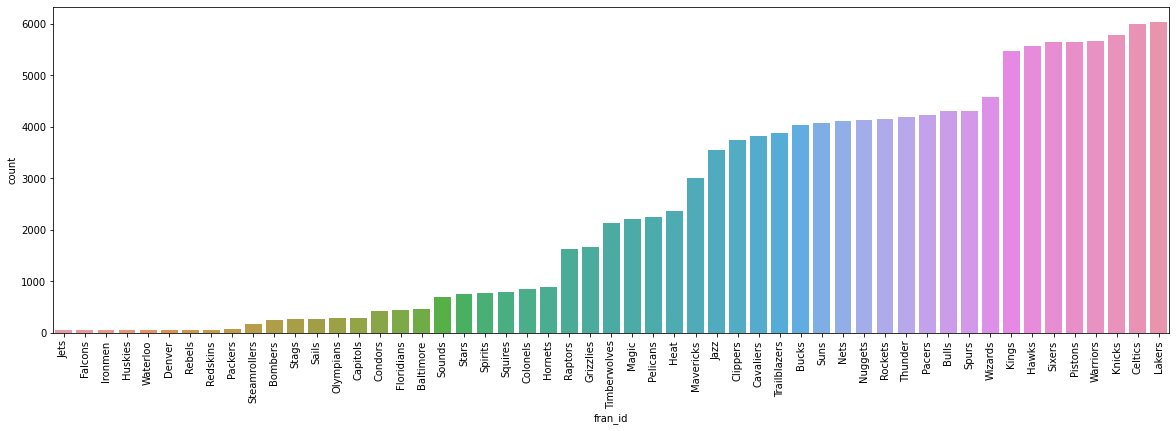

In [ ]:
#figure 1
show_categorical_var_graph_new_ver2(nba, "fran_id", False)

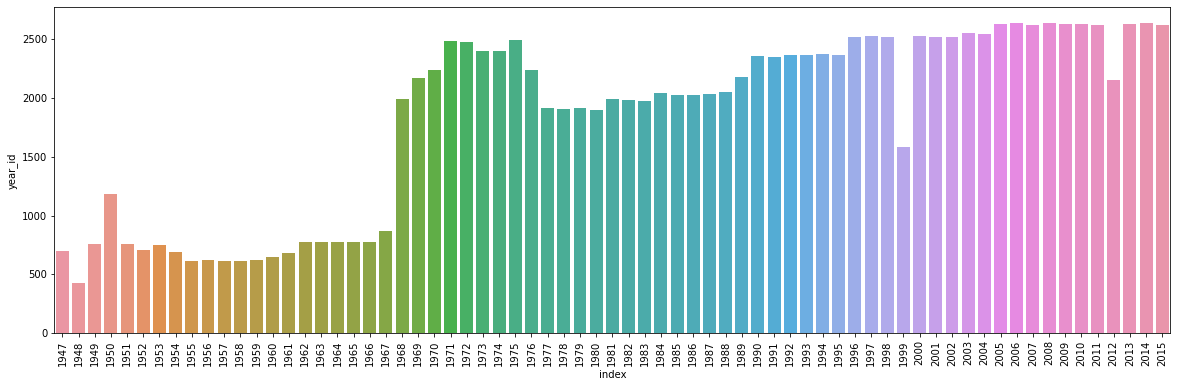

In [ ]:
# https://www.geeksforgeeks.org/args-kwargs-python/
# figure 2

show_games_byYear_df = nba.year_id.value_counts().sort_index().to_frame().reset_index()
show_games_byYear_df.head()

# TypeError: show_categorical_var_graph_new() got an unexpected keyword argument 'x'
show_categorical_var_graph_new_ver2(nba, "fran_id", True, x = "index", y = "year_id", data = show_games_byYear_df)
#plt.xticks(rotation = 90)
#plt.show()


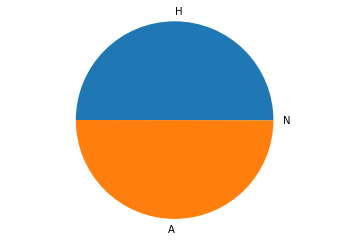

In [ ]:
#figure 3
show_categorical_var_graph_new_ver2(nba, "game_location")

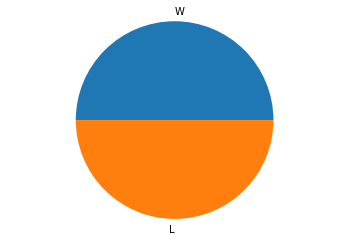

In [ ]:
#figure 4
show_categorical_var_graph_new_ver2(nba, "game_result")

### Part 4 Associations Between Variables

When exploring the associations, I calssify the situation into three types, and the word after colon is the method I might adopt:
* quantiative vs. quantiative variable: covariance, scatter plot, pearson correlation coefficient
* quantiative and (nominal) categorical variable: side-by-side boxplot, overlay histogram, mean and median comparison... 
* categorical vs. categorical varibele: contigency table, chi-square statistics, and expected contingency table



In [60]:
nba_2010 = nba[nba.year_id == 2010]
nba_2010.fran_id.value_counts()

Celtics         106
Lakers          105
Suns             98
Magic            96
Hawks            93
Cavaliers        93
Spurs            92
Jazz             92
Bucks            89
Thunder          88
Nuggets          88
Mavericks        88
Trailblazers     88
Heat             87
Bulls            87
Hornets          86
Knicks           82
Rockets          82
Nets             82
Pistons          82
Wizards          82
Kings            82
Grizzlies        82
Timberwolves     82
Pacers           82
Raptors          82
Warriors         82
Sixers           82
Clippers         82
Pelicans         82
Name: fran_id, dtype: int64

In [65]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision = 2)

# Subset Data to 2010 Season, 2014 Season
# When selecitng rows with multple conditions, make sure to use parantheses to wrap each condition!
nba_2010 = nba[(nba.year_id == 2010) & (nba.fran_id.isin(['Celtics', 'Knicks', 'Nets', 'Thunder', 'Spurs']))]
nba_2014 = nba[(nba.year_id == 2014) & (nba.fran_id.isin(['Celtics', 'Knicks', 'Nets', 'Thunder', 'Spurs']))]

nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
111032,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
111043,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
111053,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
111055,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
111056,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


In [66]:
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
121060,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
121074,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
121082,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
121085,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
121087,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


The point mean difference between knicks and nets in 2010 9.731707317073173
The point mean difference between knicks and nets in 2014 0.44706798131809933


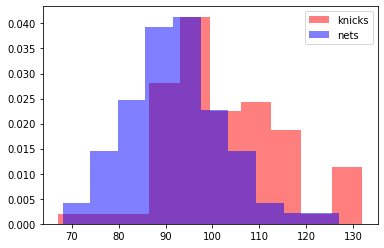

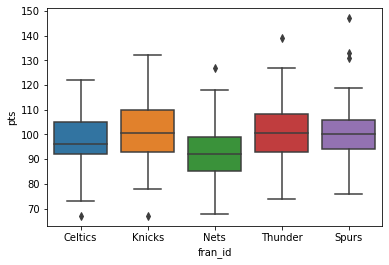

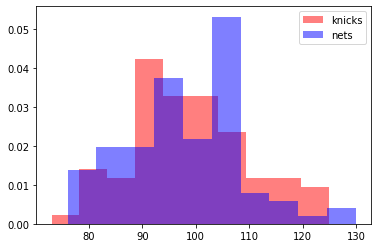

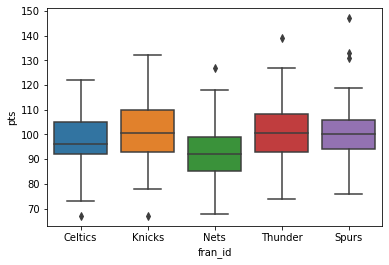

In [71]:
# focus on the 2010 data
# compare the knick to the nets with respect to points earned per game
# We want to know whether fran_id and pts are associated (categorical variable - quantiative variable), first by using np.mean()
knicks_pts_2010 = nba_2010.pts[nba.fran_id == "Knicks"]
nets_pts_2010 = nba_2010.pts[nba.fran_id == "Nets"]
diff_means_2010 = np.mean(knicks_pts_2010) - np.mean(nets_pts_2010)

knicks_pts_2014 = nba_2014.pts[nba.fran_id == "Knicks"]
nets_pts_2014 = nba_2014.pts[nba.fran_id == "Nets"]
diff_means_2014 = np.mean(knicks_pts_2014) - np.mean(nets_pts_2014)

print("The point mean difference between knicks and nets in 2010", diff_means_2010)
print("The point mean difference between knicks and nets in 2014", diff_means_2014)

# By overlapping histogram

f1 = plt.figure(1)
knick_hist = plt.hist(knicks_pts_2010, color = "red", label = "knicks", alpha = 0.5, density = True)
net_hist = plt.hist(nets_pts_2010, color = "blue", label = "nets", alpha = 0.5, density = True)
plt.legend()
plt.show()


# By boxplot
# When using multiple selection criteria, make sure to use bitwise operator
f2 = plt.figure(2)
#df_2010_knicks_nets = nba_2010[(nba.fran_id == "Knicks") | (nba.fran_id == "Nets")]
#print(df_2010_knicks_nets)
sns.boxplot(data = nba_2010, x = "fran_id", y = "pts")
plt.show()

# compare the 2010 games to 2014


f3 = plt.figure(3)
knick_hist = plt.hist(knicks_pts_2014, color = "red", label = "knicks", alpha = 0.5, density = True)
net_hist = plt.hist(nets_pts_2014, color = "blue", label = "nets", alpha = 0.5, density = True)
plt.legend()
plt.show()

# focus on data in 2010
#relationship btw franchise and point scored per game
#Overlap bte the box and the chart suugest fran_id and pts are associated?
f4 = plt.figure(4)
sns.boxplot(data = nba_2010, x = "fran_id", y = "pts")
plt.show()


In [72]:

# do teams tend to win more games at home compared ot away?
#use contigency table, then calculate the chisquare statistic baed on contingency table
# based on the statistics, we can say that there is association btw the variables
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

chi2_location_result = chi2_contingency(location_result_freq)[0]
expected_location_result_freq = chi2_contingency(location_result_freq)[3]
print("The chi square statistics will be {}".format(chi2_location_result))
print("The expected contogency table when there is no difference")
print(expected_location_result_freq)
print("\n")

#table of proportions
location_result_pro = location_result_freq/len(nba_2010)
print("Table of proportions")
print(location_result_pro) 



game_location    A    H
game_result            
L              133  105
W               92  120
The chi square statistics will be 6.501704455367053
The expected contogency table when there is no difference
[[119. 119.]
 [106. 106.]]


Table of proportions
game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


The covariance of the two variables is 1.3746125676458802


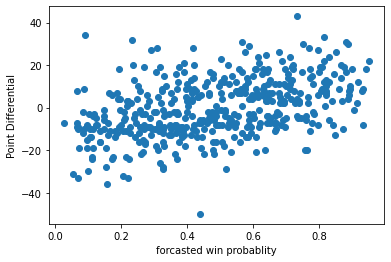

The correlation coefficient between forcast and poit difference is 0.44020887084680815


In [73]:
# does team with the higher probablity of winning also tend to win games by more points?
# calculate covariance,plot scatter plot, and calculate pearson corrlation coefficient

forecast_ptDiff_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)[1][0]
print("The covariance of the two variables is {}".format(forecast_ptDiff_cov)) #slightly positive linear relationship

f4 = plt.figure(5)
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
plt.xlabel("forcasted win probablity")
plt.ylabel("Point Differential")
plt.show()

forecast_ptDiff_corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print("The correlation coefficient between forcast and poit difference is {}".format(forecast_ptDiff_corr)) #somewhat weak relationships

